
# KNN 
### I explore the strategy of KNN. 
- I create a weighted KKN ensamble model
- Create 3 KNN's with 3,10 and 20 periods. 
- Each period produces a mean and std() of what the next periods price will be.
- The std() represents the confidence in the prediction. 


In [73]:
from itertools import permutations,combinations
ll = [2,1,1]
list(combinations(ll,2))

[(2, 1), (2, 1), (1, 1)]

In [ ]:
# train the model
# on what data, how many knns
# do a lin model on the outputs of the 3 knn near term, med term, long term mods


In [1]:
# Look for similiar patters in the past using KNN
# Use commodities
# make ensamble model
# implement 3 fold CV 
# give a numerical value of money made, in percentage?
# plot predictions against acutals
# Save down the training data sample used and then pick the most relevant parts and reweight to that
# set up some persistence around data, so you are not redownloading all the yfinance data for every piece of 
# exploratory analysis you want to do

In [2]:
## Imports

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotnine as pn
import pickle
from dateutil.relativedelta import relativedelta
from dateutil import parser
import datetime
from IPython.display import display
import os


from autoIG import tickers
from autoIG.utils import format_date
from autoIG import autoknn


[1.0085201447364578]
No buy lads


In [4]:
## config

In [5]:
START_DATE = "2000-01-01"
END_DATE = "2020-01-01"
INTERVAL  = "1d"

def days_ago(n):
    return format_date(datetime.datetime.now() - relativedelta(days=n))

history_config = {
    "start": START_DATE,
    "end": END_DATE,
    "interval": INTERVAL
    }

history_config_new = {
    "start": days_ago(10) ,
    "interval": INTERVAL,
}

In [6]:
## functions

In [7]:
def transform_to_knn(df,n = 3):
    s = df.Open.to_list() +[np.NaN] # so that if there arent 4 (at the end), we get an Na
    d = df.Date.to_list()
    col_names = ["m"+str(n-i) for i in range(n+1)]+['id']
    df_dict = [dict( zip( col_names, s[i : (i + n+1) ]+[str(d[i].date())+" : "+str(d[i +n-1].date())]) ) for i in range(len(s) - (n-1)-1 )] # minus an extra1 to account for the na we added on
    df_transformed = pd.DataFrame(
        df_dict
    )

    df_transformed= df_transformed.fillna(np.NaN)
    for i in col_names[-2::-1]:
        df_transformed[i] =  df_transformed[i]/df_transformed[col_names[0]] # get the first and further back col name 

    return df_transformed

In [11]:
gold = yf.Ticker(tickers.GOLD_TICKER)

In [12]:
# history_raw = gold.history(**history_config)
# history = history_raw.reset_index().reset_index()
# history.head(3)
# history.to_pickle(os.path.join("data","training","daily_gold_20080830_20200101.pkl"))

In [13]:

def load_historical_gold_data():
    path = os.path.join("data","training","daily_gold_20080830_20200101.pkl")
    return pd.read_pickle(path)

history_raw = load_historical_gold_data()

In [14]:
history= history_raw

In [15]:
modern_history = gold.history(**history_config_new).reset_index().reset_index()
display(modern_history)
transform_to_knn(modern_history)  # .drop(['id'],axis = 1).columns
# model.predict(transform_to_knn(modern_history).drop(['m0','id'],axis = 1))
filename =  '/Users/ezracitron/my_projects/autoIG/knn_regressor.sav'
# pickle.dump(knn_regressor, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))
model.predict(autoknn.transform_to_knn(modern_history).iloc[:,0:3])

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2022-06-01,1831.000000,1847.900024,1825.300049,1843.300049,1623,0,0
1,1,2022-06-02,1845.400024,1868.699951,1842.099976,1866.500000,551,0,0
2,2,2022-06-03,1867.599976,1871.800049,1845.400024,1845.400024,53,0,0
3,3,2022-06-06,1849.000000,1854.099976,1839.199951,1839.199951,142,0,0
4,4,2022-06-07,1836.900024,1851.599976,1835.000000,1847.500000,1168,0,0
5,5,2022-06-08,1844.800049,1855.000000,1844.400024,1851.900024,218,0,0
6,6,2022-06-09,1846.099976,1850.099976,1837.900024,1848.800049,159,0,0
7,7,2022-06-10,1842.699951,1875.599976,1823.900024,1871.500000,159,0,0


array([[1.0218741233139024],
       [1.0008013652728744],
       [0.9831207173644506],
       [1.0118666368779452],
       [1.005345765414899],
       [1.0085201447364578]], dtype=object)

In [16]:
# (
#     pn.ggplot(history)+
#     pn.geom_point(pn.aes('Date','Open'))+
#     pn.theme(figure_size=[18,3])
# )


In [17]:
days_ago(0)

'2022-06-12'

In [18]:
history.Date.max()

Timestamp('2019-12-31 00:00:00')

In [19]:
train = history.query(f"Date < '{days_ago(360)}'")
test = history.query(f"Date > '{days_ago(360*4)}'")
display(train.head(3))
display(test.head(3))


,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0,0,0
1,1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0,0,0
2,2,2000-09-01,277.000000,277.000000,277.000000,277.000000,0,0,0


,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4472,4472,2018-07-05,1255.500000,1257.300049,1253.599976,1257.300049,9,0,0
4473,4473,2018-07-06,1255.500000,1255.500000,1254.300049,1254.300049,7,0,0
4474,4474,2018-07-09,1258.199951,1262.300049,1257.699951,1258.099976,37,0,0


In [20]:
# from sklearn.base import BaseEstimator,TransformerMixin
# class KnnTransformer(BaseEstimator,TransformerMixin):
#     def __init__(self,n):
#         self.n = n
#     def fit(self,X):
#         return self
#     def transform(self,X,y=None):
#         X_ = X.copy()
#         return transform_to_knn(X_,n = self.n)

# kt = KnnTransformer(n=  3)
# kt.fit_transform(train)

        


In [21]:
train_df = autoknn.transform_to_knn(train,n=3)
test_df = autoknn.transform_to_knn(test,n=3)
# train_df.head(3)

In [22]:
train_X = train_df.drop(['m0','id'],axis = 1)
train_y = train_df[['m0']]
test_X = test_df.drop(['m0','id'],axis = 1)
test_y = test_df[['m0']]


## Implement in a pipeline

In [23]:
from feature_engine.selection import DropFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [26]:
knn_regressor = KNeighborsRegressor(n_neighbors=3).fit(train_X,train_y)

knn_pl = Pipeline(
    [
        ('drop_features', DropFeatures(features_to_drop=['id']) ),
        ('knnreg' , KNeighborsRegressor(n_neighbors=6))
    ]
    )

knn_regressor

ValueError: Input y contains NaN.

In [27]:
# knn_pl.fit(X = train_X,y= train_y)
plt_data = test_df.assign(preds=  model.predict(test_X),buy = lambda df: df.preds>1.01,up = lambda df: df.m0>df.m1)
plt_data.value_counts(['buy','up'])


buy    up   
False  True     168
       False    138
True   False     38
       True      30
dtype: int64

In [28]:

## hiw are buys disr across time

In [29]:
from pandas import to_datetime

In [30]:
plt_data = plt_data.assign(Date = lambda df:  to_datetime( df.id.str.slice(13,)) )
plt_data

,m3,m2,m1,m0,id,preds,buy,up,Date
0,1.0,1.000000,1.002150,1.000558,2018-07-05 : 2018-07-09,0.992522,False,False,2018-07-09
1,1.0,1.002150,1.000558,0.998168,2018-07-06 : 2018-07-10,1.004381,False,False,2018-07-10
2,1.0,0.998410,0.996026,0.986250,2018-07-09 : 2018-07-11,0.999775,False,False,2018-07-11
3,1.0,0.997612,0.987820,0.990845,2018-07-10 : 2018-07-12,0.993163,False,True,2018-07-12
4,1.0,0.990185,0.993217,0.991621,2018-07-11 : 2018-07-13,0.988889,False,False,2018-07-13
...,...,...,...,...,...,...,...,...,...
369,1.0,1.003792,1.008126,1.019300,2019-12-20 : 2019-12-24,1.008205,False,True,2019-12-24
370,1.0,1.004318,1.015449,1.021251,2019-12-23 : 2019-12-26,1.004042,False,True,2019-12-26
371,1.0,1.011083,1.016860,1.016054,2019-12-24 : 2019-12-27,1.014419,True,False,2019-12-27
372,1.0,1.005714,1.004916,1.005714,2019-12-26 : 2019-12-30,1.002327,False,True,2019-12-30


In [31]:
import plotnine as pn
from plotnine import ggplot, aes, geom_col, theme, geom_point,scale_x_continuous ,scale_y_continuous, geom_histogram, geom_line, labs,facet_wrap

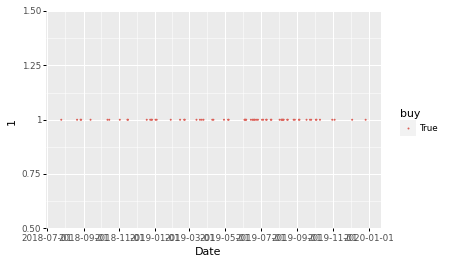

<ggplot: (311333840)>

In [32]:
(
    ggplot(plt_data.query('buy'))+
    geom_point(aes('Date',1,color=  'buy'),size = .1)#+
    # theme(figure_size=[20,1])
)

In [33]:
plt_data.query('buy').assign(pr=lambda df:df.m0/df.m1)

,m3,m2,m1,m0,id,preds,buy,up,Date,pr
12,1.0,1.001555,1.007692,1.004746,2018-07-23 : 2018-07-25,1.015353,True,False,2018-07-25,0.997077
31,1.0,1.008598,1.012854,1.017026,2018-08-17 : 2018-08-21,1.016058,True,True,2018-08-21,1.004118
35,1.0,0.996637,1.017657,1.017153,2018-08-23 : 2018-08-27,1.016451,True,False,2018-08-27,0.999504
36,1.0,1.021092,1.020585,1.016789,2018-08-24 : 2018-08-28,1.02489,True,False,2018-08-28,0.996280
47,1.0,1.012265,1.010921,1.003864,2018-09-11 : 2018-09-13,1.014571,True,False,2018-09-13,0.993020
...,...,...,...,...,...,...,...,...,...,...
317,1.0,1.012287,1.014637,1.001679,2019-10-08 : 2019-10-10,1.01823,True,False,2019-10-10,0.987229
332,1.0,1.000875,1.006864,1.016892,2019-10-29 : 2019-10-31,1.015261,True,True,2019-10-31,1.009959
334,1.0,1.009959,1.010360,1.007352,2019-10-31 : 2019-11-04,1.014533,True,False,2019-11-04,0.997023
355,1.0,0.999180,1.010049,1.008135,2019-12-02 : 2019-12-04,1.010843,True,False,2019-12-04,0.998105


In [43]:
plt_data.preds=plt_data.preds.astype(np.float64)

In [34]:
plt_data.m0.min()

0.9661508704061895

,m3,m2,m1,m0,id,preds,buy,up,Date
0,1.0,1.000000,1.002150,1.000558,2018-07-05 : 2018-07-09,0.992522,False,False,2018-07-09
1,1.0,1.002150,1.000558,0.998168,2018-07-06 : 2018-07-10,1.004381,False,False,2018-07-10
2,1.0,0.998410,0.996026,0.986250,2018-07-09 : 2018-07-11,0.999775,False,False,2018-07-11
3,1.0,0.997612,0.987820,0.990845,2018-07-10 : 2018-07-12,0.993163,False,True,2018-07-12
4,1.0,0.990185,0.993217,0.991621,2018-07-11 : 2018-07-13,0.988889,False,False,2018-07-13
...,...,...,...,...,...,...,...,...,...
368,1.0,1.000542,1.004336,1.008673,2019-12-19 : 2019-12-23,1.003367,False,True,2019-12-23
369,1.0,1.003792,1.008126,1.019300,2019-12-20 : 2019-12-24,1.008205,False,True,2019-12-24
370,1.0,1.004318,1.015449,1.021251,2019-12-23 : 2019-12-26,1.004042,False,True,2019-12-26
371,1.0,1.011083,1.016860,1.016054,2019-12-24 : 2019-12-27,1.014419,True,False,2019-12-27


/Users/ezracitron/my_projects/autoIG/.venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


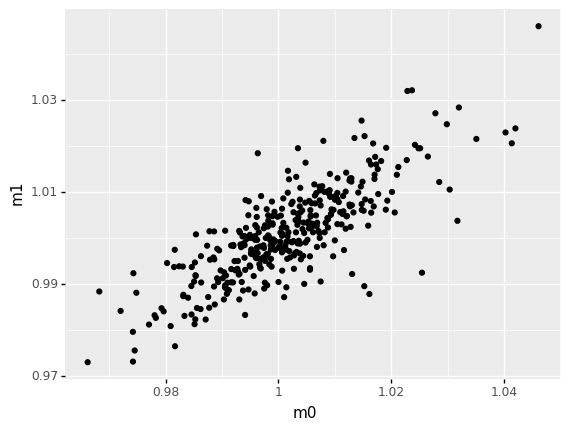

<ggplot: (312695242)>

In [45]:
import importlib
import plotnine
(
    pn.ggplot()+
    pn.geom_point(aes(plt_data.m0,plt_data.m1))+
    theme()
)

In [60]:
from scipy.stats import linregress
lm_data=plt_data[~plt_data.m0.isna()]
lm= linregress(x = lm_data.preds,y = lm_data.m0)
print(lm.rvalue)
lm= linregress(x = lm_data.m1,y = lm_data.m0)
print(lm.rvalue)

0.693165767061153
0.7965741240547698


In [253]:
from sklearn.model_selection import cross_validate, GridSearchCV
cross_validate(estimator = knn_regressor, X=train_X,y= train_y, cv=3,scoring="neg_mean_squared_error" )

{'fit_time': array([0.00617599, 0.00548697, 0.00508499]),
 'score_time': array([0.00500107, 0.00805306, 0.00651002]),
 'test_score': array([-0.00026379, -0.00016362, -0.00011011])}

In [255]:
grid_search = GridSearchCV(estimator = knn_regressor, param_grid={"n_neighbors":[1,3,5,7]})
grid_search

GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=4),
             param_grid={'n_neighbors': [1, 3, 5, 7]})

In [267]:
filename =  '../knn_regressor.sav'
# pickle.dump(knn_regressor, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))

In [52]:
from  sklearn.metrics import confusion_matrix,mean_squared_error

In [268]:
mean_squared_error(model.predict(test_X),test_y)

0.00013791091432390485

In [54]:
df_test_accuracy = df_test_accuracy.assign(diff = lambda df: df.preds- df.m0)
df_test_accuracy.head()

,m3,m2,m1,m0,preds,preds_bool,diff
0,1.0,0.998609,1.001700,1.003478,1.000798,1,-0.002680
1,1.0,1.003096,1.004876,1.002477,1.011788,1,0.009311
2,1.0,1.001775,0.999383,1.002469,1.006370,1,0.003901
3,1.0,0.997612,1.000693,0.999538,1.003020,1,0.003482
4,1.0,1.003088,1.001930,0.998996,1.006627,1,0.007630


/Users/ezracitron/my_projects/autoIG/.venv/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 43'. Pick better value with 'binwidth'.


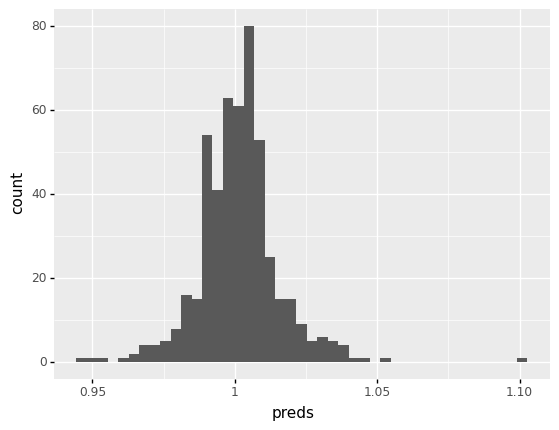

<ggplot: (306439684)>

In [55]:
import plotnine as pn
from plotnine import ggplot, aes, geom_point, geom_col, theme, geom_point,scale_x_continuous ,scale_y_continuous, geom_histogram, geom_line, labs
(
    ggplot(df_test_accuracy)+
    pn.geom_histogram(aes('preds'))+
    theme()
)

/Users/ezracitron/my_projects/autoIG/.venv/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 52'. Pick better value with 'binwidth'.


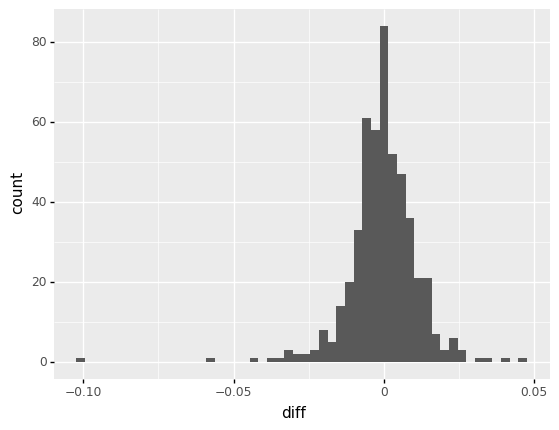

<ggplot: (306610288)>

In [56]:
import plotnine as pn
from plotnine import ggplot, aes, geom_point, geom_col, theme, geom_point,scale_x_continuous ,scale_y_continuous, geom_histogram, geom_line, labs
(
    ggplot(df_test_accuracy)+
    pn.geom_histogram(aes('diff'))+
    theme()
)

In [57]:
# how many times did we predict up and it went down and vice versa
df_test_accuracy = df_test_accuracy.assign(preds_bool= lambda df: ((df.preds > 1) * (df.m0> 1)).astype(int) )  # this cleverly checks if theyre the same sign
df_test_accuracy


,m3,m2,m1,m0,preds,preds_bool,diff
0,1.0,0.998609,1.001700,1.003478,1.000798,1,-0.002680
1,1.0,1.003096,1.004876,1.002477,1.011788,1,0.009311
2,1.0,1.001775,0.999383,1.002469,1.006370,1,0.003901
3,1.0,0.997612,1.000693,0.999538,1.003020,0,0.003482
4,1.0,1.003088,1.001930,0.998996,1.006627,0,0.007630
...,...,...,...,...,...,...,...
493,1.0,1.004243,1.001491,0.989909,0.998599,0,0.008689
494,1.0,0.997260,0.985727,0.985613,0.980172,0,-0.005441
495,1.0,0.988436,0.988321,0.964964,0.991892,0,0.026927
496,1.0,0.999884,0.976254,0.989980,0.985539,0,-0.004441


In [58]:
# now we check how many went does when my algo said it preds was above 0.01
df_test_accuracy = df_test_accuracy.assign(confident_preds = lambda df: (df.preds>1.01).astype(int), m0_above_1 = lambda df: (df.m0>1).astype(int) )
df_test_accuracy.head()

,m3,m2,m1,m0,preds,preds_bool,diff,confident_preds,m0_above_1
0,1.0,0.998609,1.001700,1.003478,1.000798,1,-0.002680,0,1
1,1.0,1.003096,1.004876,1.002477,1.011788,1,0.009311,1,1
2,1.0,1.001775,0.999383,1.002469,1.006370,1,0.003901,0,1
3,1.0,0.997612,1.000693,0.999538,1.003020,0,0.003482,0,0
4,1.0,1.003088,1.001930,0.998996,1.006627,0,0.007630,0,0


In [60]:
df_test_accuracy.value_counts(['confident_preds','m0_above_1']).reset_index().rename(columns = {0:'value'})

,confident_preds,m0_above_1,value
0,0,0,232
1,0,1,173
2,1,1,89
3,1,0,4


In [61]:
## Where are the confident preds


In [129]:
# is there any value that beats it?
for i in np.arange(-0.05,0.05,0.005):
    print(f"{i}: {mean_squared_error(df_test.m0,[i]*len(df_test))}")

-0.05: 0.0029935118806478397
-0.045000000000000005: 0.002500373541784269
-0.04000000000000001: 0.0020572352029206973
-0.03500000000000001: 0.0016640968640571259
-0.030000000000000013: 0.0013209585251935543
-0.025000000000000015: 0.001027820186329983
-0.020000000000000018: 0.0007846818474664115
-0.01500000000000002: 0.0005915435086028397
-0.010000000000000023: 0.00044840516973926797
-0.005000000000000025: 0.00035526683087569623
-2.7755575615628914e-17: 0.00031212849201212446
0.00499999999999997: 0.00031899015314855266
0.009999999999999967: 0.00037585181428498077
0.014999999999999972: 0.000482713475421409
0.019999999999999962: 0.0006395751365578368
0.024999999999999953: 0.0008464367976942647
0.029999999999999957: 0.0011032984588306928
0.03499999999999996: 0.001410160119967121
0.03999999999999995: 0.0017670217811035485
0.04499999999999994: 0.0021738834422399757
